# **Air Quality Forecast: Machine Learning Model**

Air quality has a significant impact on human health and the environment. The main factors affecting air quality in India are:

- PM2.5 and PM10: Particulate matter
- NO, NO2, NOx: Nitrogen oxides
- NH3: Ammonia
- CO: Carbon monoxide
- SO2: Sulfur dioxide
- O3: Ozone
- Benzene, Toluene, Xylene: Volatile organic compounds

The primary goal of our air quality prediction model is to accurately forecast the Air Quality Index (AQI). AQI is an indicator that shows the level of air pollution and its effects on public health.

Our model predicts future AQI values based on the levels of various pollutants that affect air quality. These predictions assist decision-makers in issuing health alerts, formulating environmental policies, optimizing traffic and industrial management, and helping the general public plan their daily activities.

**What is the business problem you are trying to solve using machine learning?**
* The problem you are trying to solve in this project is to predict future Air Quality Index (AQI) values by analyzing the factors affecting AQI using machine learning algorithms. These predictions can be used to monitor air quality and develop improvement strategies. The goal is to identify the impact of various pollutant parameters (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene) on AQI and to forecast AQI based on the future values of these parameters.

**Why are we interested in solving this problem? What impact will it have on the business?**

- Solving this problem is of great importance for public health, environmental sustainability, and the protection of biodiversity. Accurately predicting air quality allows authorities and the public to take measures against air pollution. 


### Loading the required Library Packages

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

### Reading and exploring the Health Care Dataset

In [2]:
df = pd.read_csv('air quality data.csv')

**ANALYZING THE DATASET**
- Size, data types, null value rate, statistical information for each column

In [3]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [4]:
# Checking the number of rows and columns of the dataset
df.shape

(29531, 14)

In [5]:
# Dataset Information Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [6]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [7]:
# There no Duplicate values present in the dataset
df.duplicated().sum()

2297

In [8]:
# Drop rows where the 'AQI' column has missing values
df1= df.dropna(subset=['AQI'],inplace=True)


In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [10]:
df.shape

(24850, 14)

In [11]:
# Summary Statistics for the Dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
#in this DataFrame and the percentage of these null values 
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [13]:
null_values_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

### Key Considerations:
Xylene has the highest percentage of missing values (61.86%), so you'll need to decide whether to impute these values or drop the feature.

PM10 and NH3 also have significant missing values (around 28-26%).

No Missing Values:
City And AQI have 0% null values

### Now we will start our Data Exploration using Visualization EDA - Univariate analysis for each feature

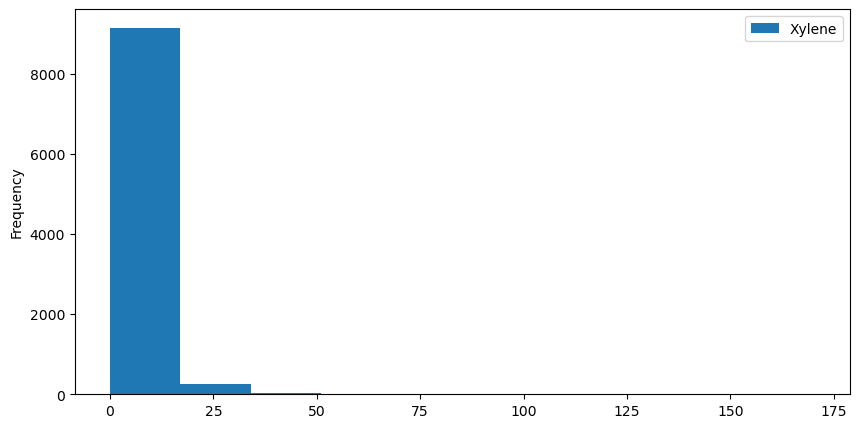

In [14]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

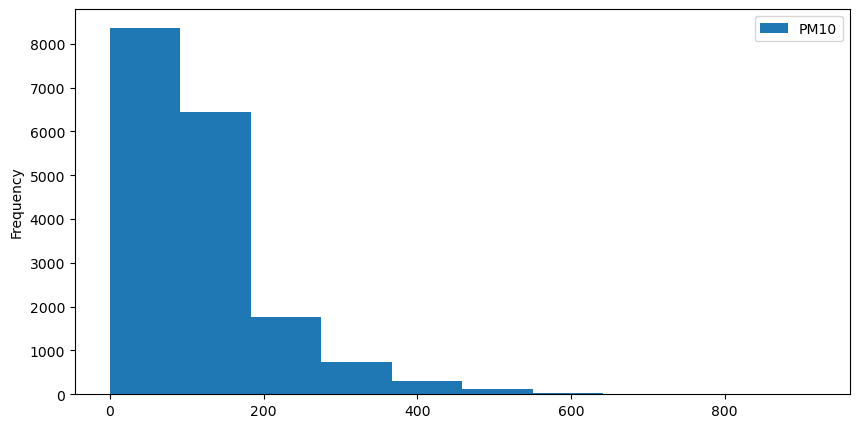

In [15]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

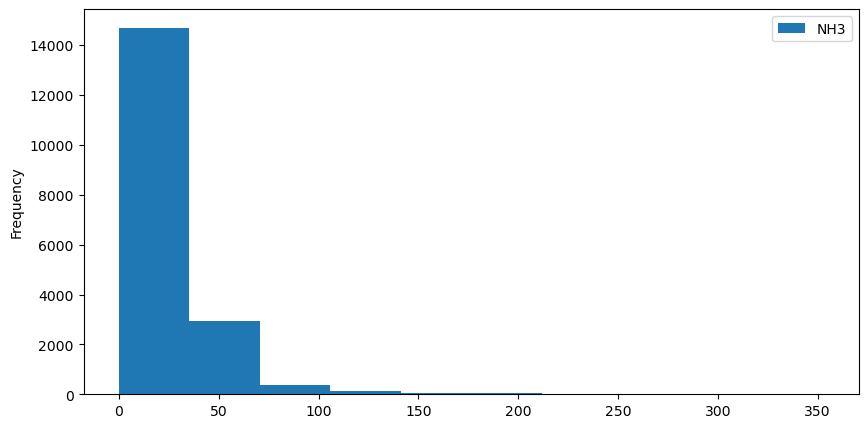

In [16]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

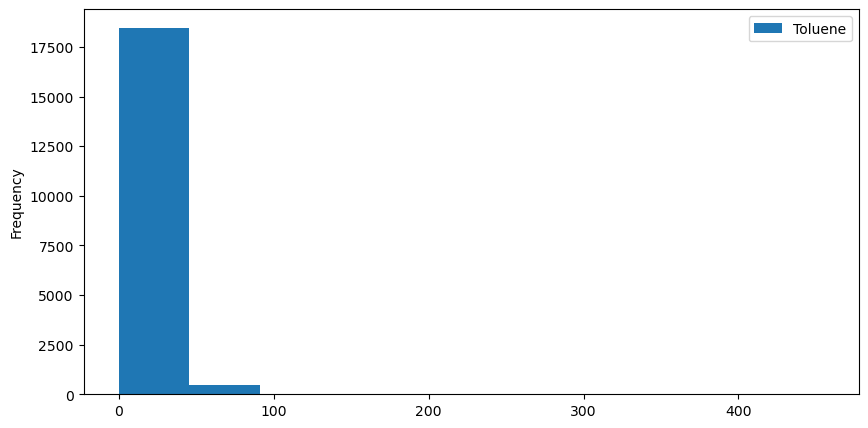

In [17]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

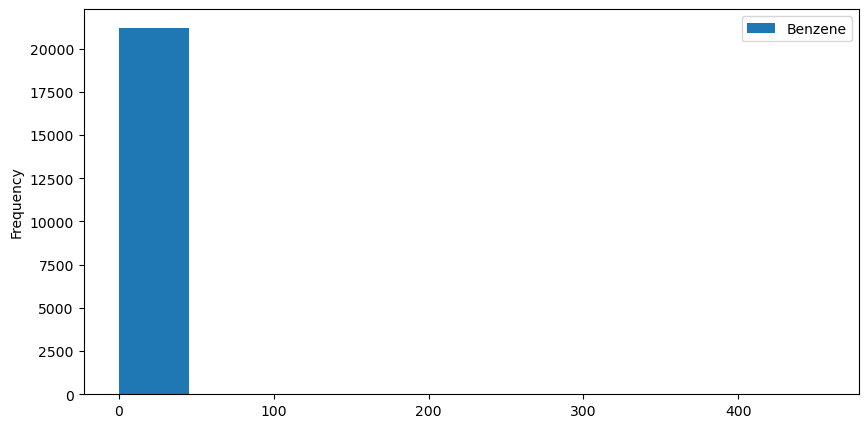

In [18]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

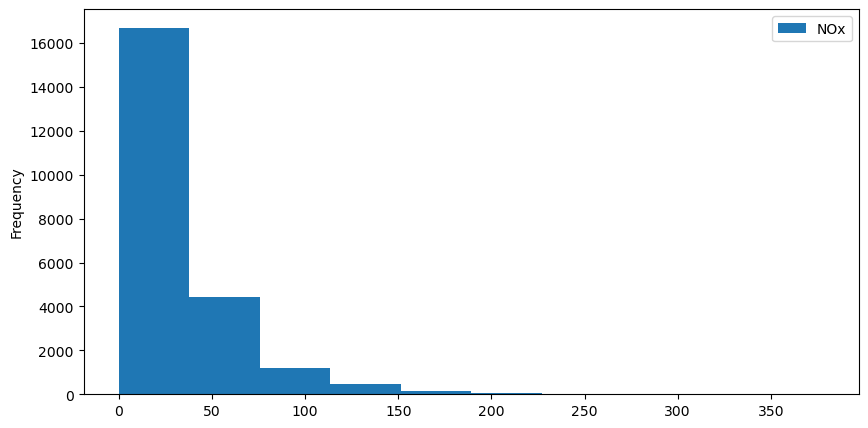

In [19]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

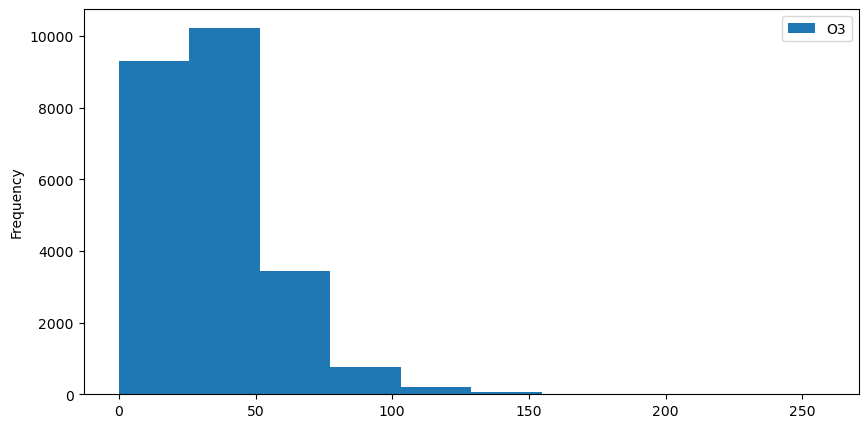

In [20]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

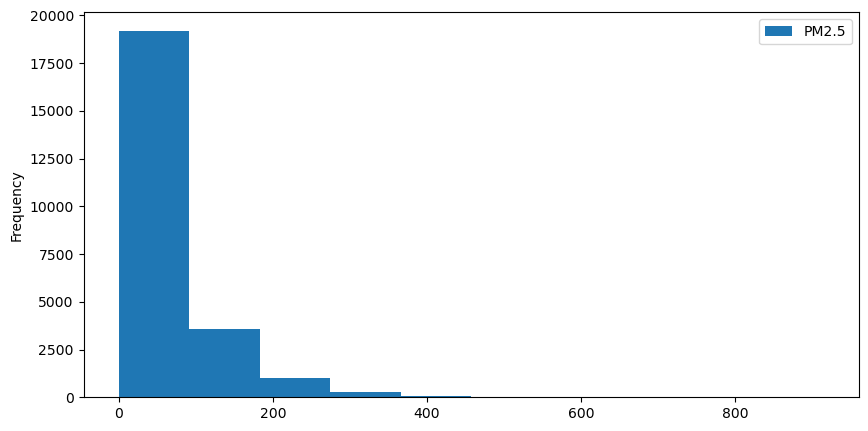

In [21]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

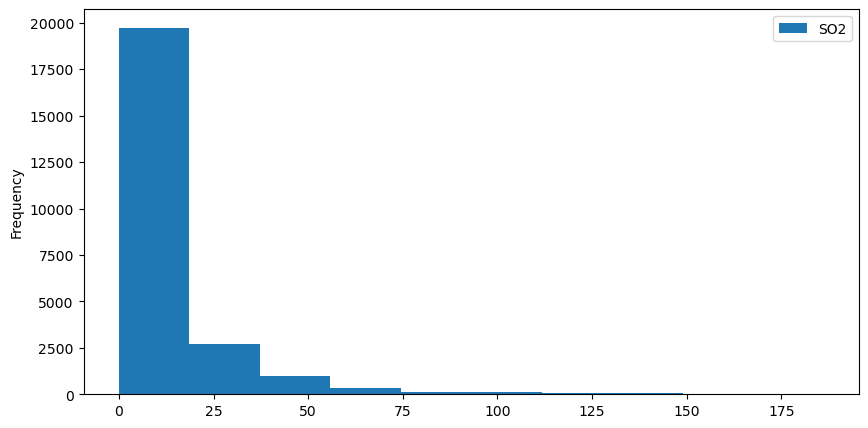

In [22]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

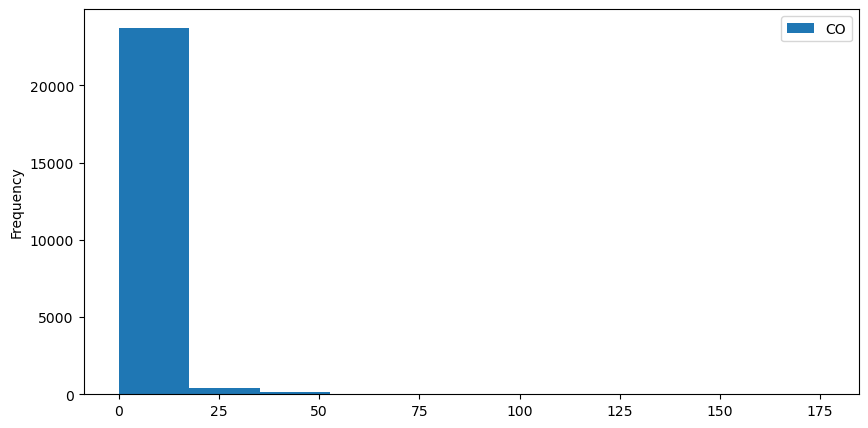

In [23]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

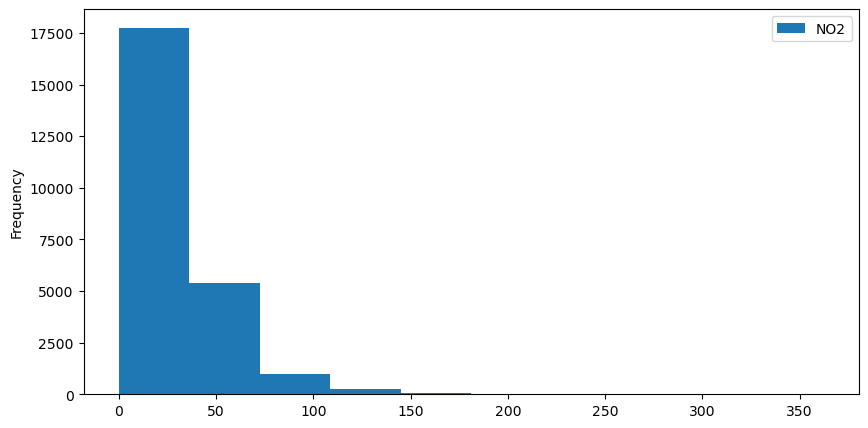

In [24]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

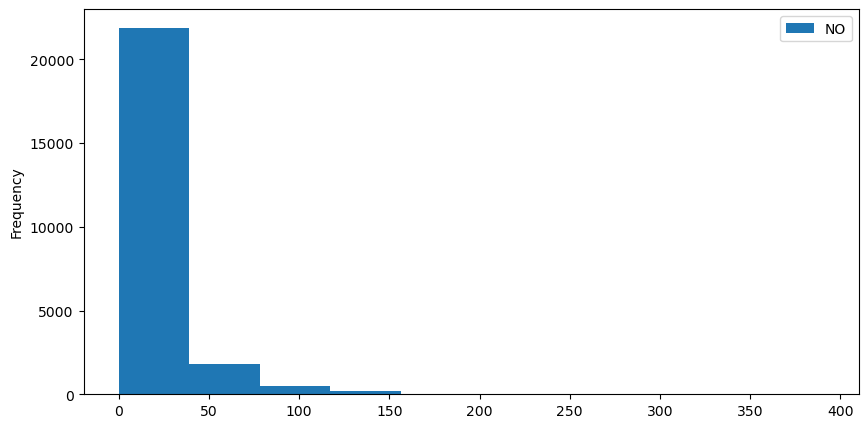

In [25]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

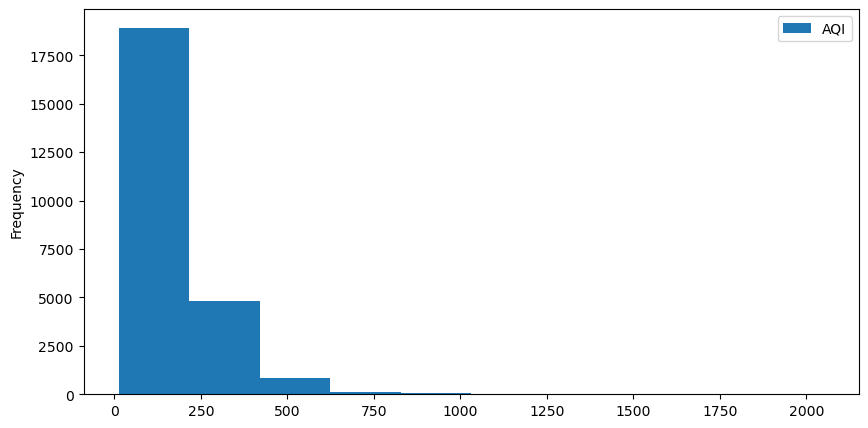

In [26]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

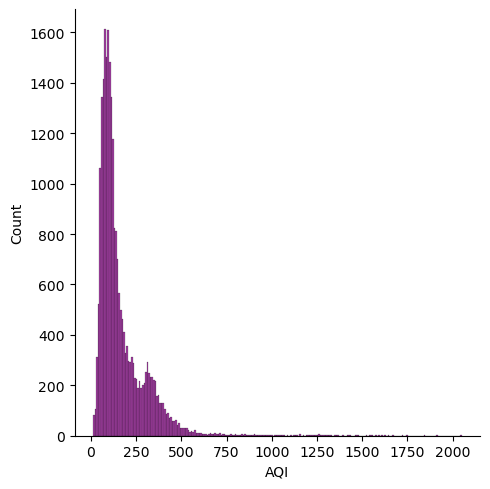

In [27]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="purple")
plt.show()

In the below plot, we can see the frequency of the different city types present in the whole dataset.

### Bivariate analysis

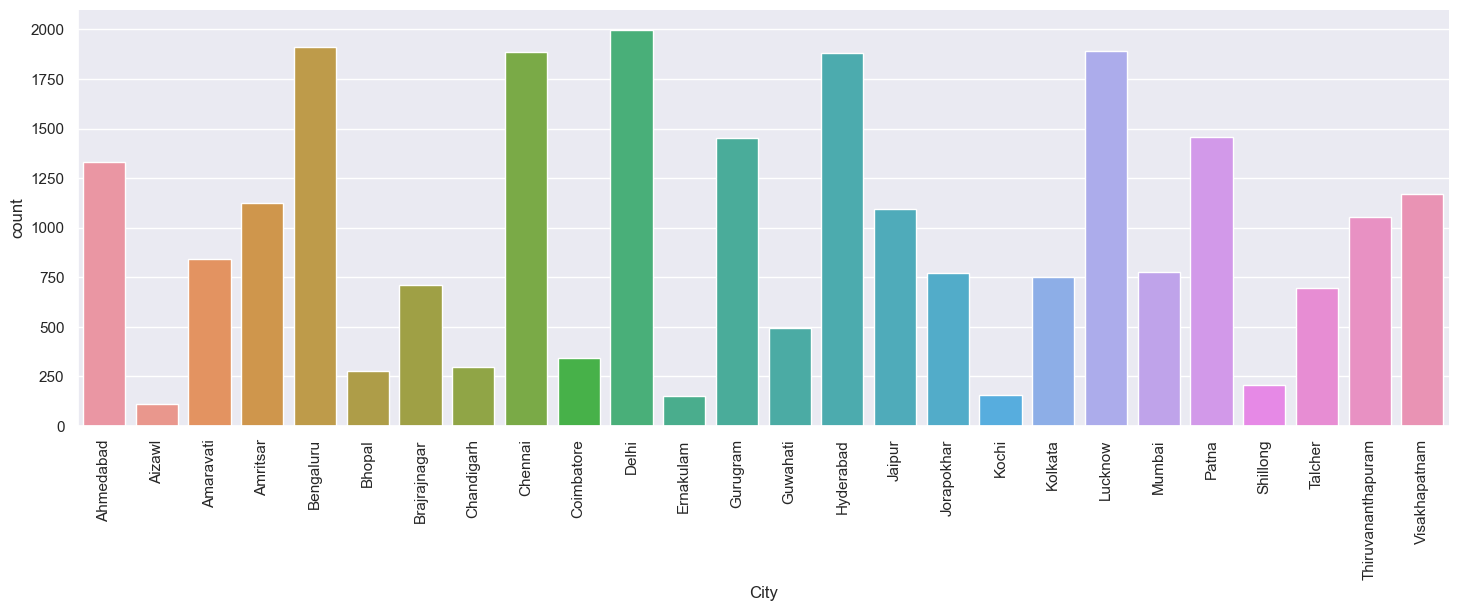

In [28]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In [29]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [30]:
df = df.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})


In [31]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [32]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


### Detecting Outliers and Treatment

We drew boxplots to observe outlier data.

<Axes: >

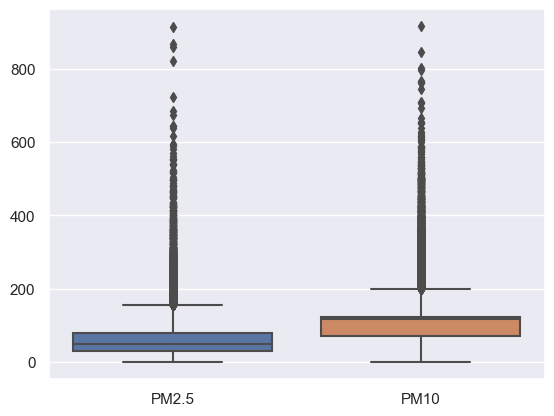

In [33]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

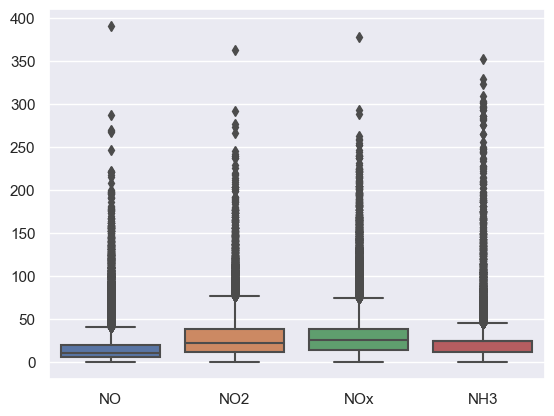

In [34]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

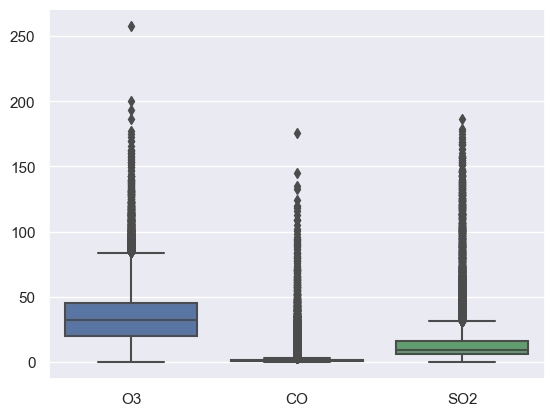

In [35]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

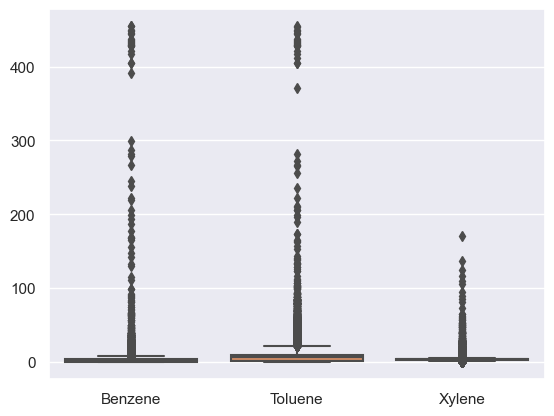

In [36]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

**DATA EDITING PROCEDURES**
- Procedures related to outlier data, missing data, data that has little relationship with our target column

We observed that there were too many outliers in our independent variables. We thought that the modeling we would do with this data would give us incorrect results, so we changed the outliers.

In [37]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, 
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.616411,6.091530,0.01,5.79,9.430000,15.940000,31.16
O3,24850.0,33.288444,17.509123,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


We created another box plot for the data in the columns of the current DataFrame.

<Axes: >

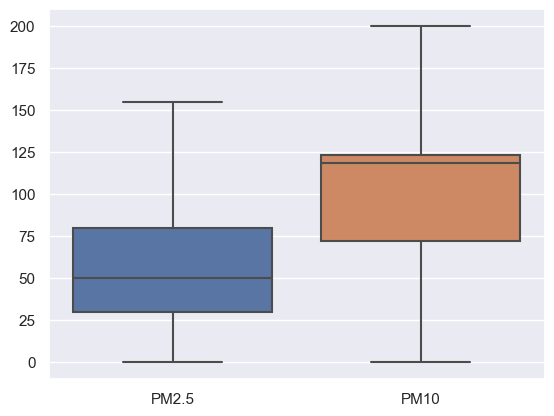

In [39]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

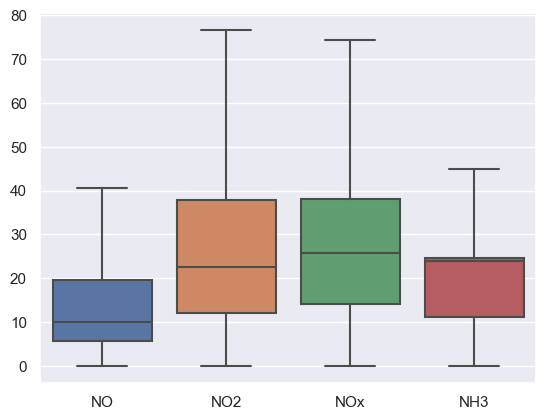

In [40]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

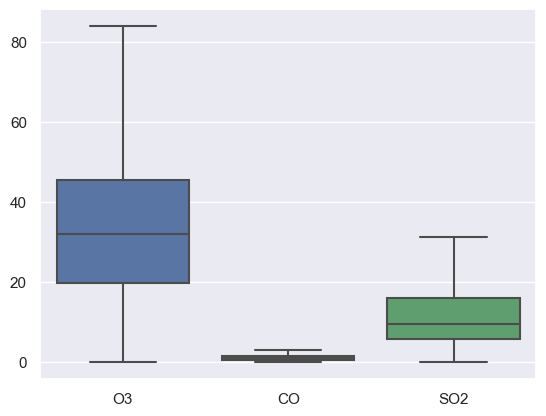

In [41]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

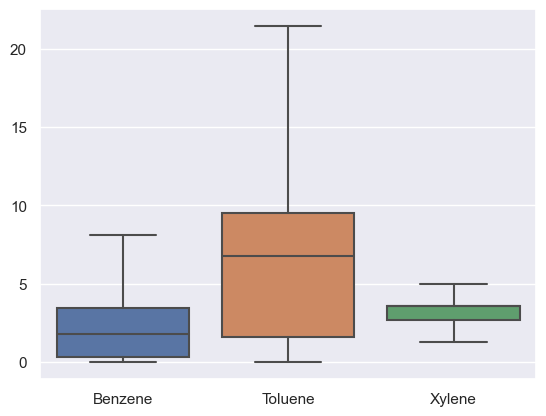

In [42]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

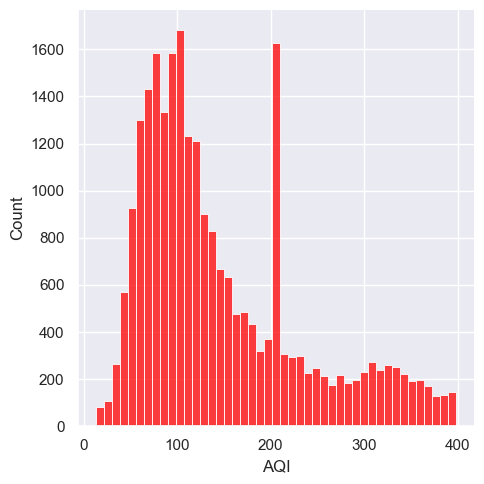

In [43]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="red")
plt.show()

In [44]:
df1=df.drop(columns=['City'])

#### Multivariate analysis

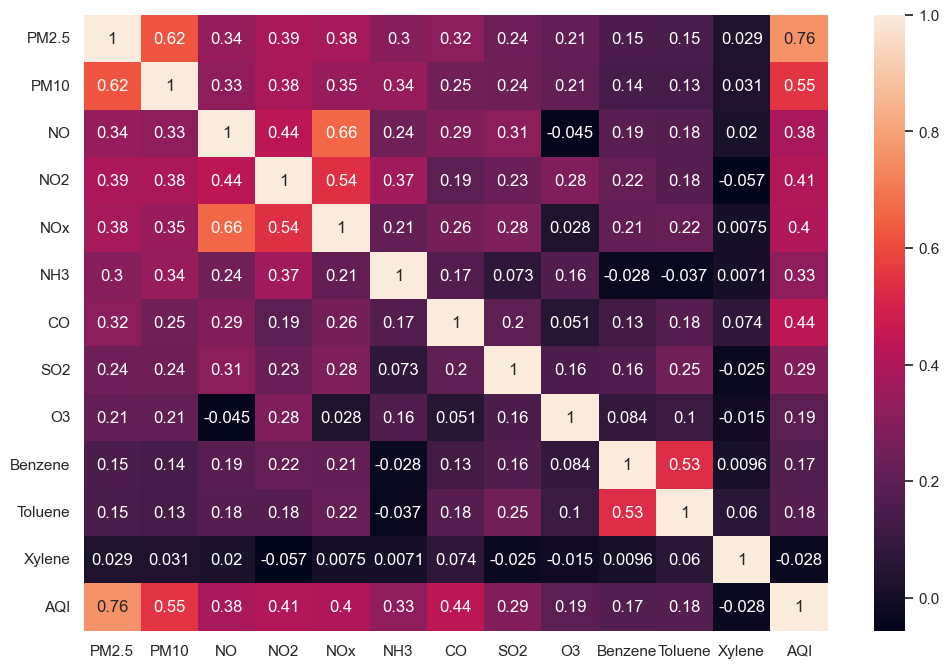

In [45]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1.corr(),annot=True) 
plt.show() 

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx.We will make predictions based on data above 0.25

In [46]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.02,0.00,3.140000,209.0
29,Ahmedabad,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.04,0.00,4.810000,328.0
30,Ahmedabad,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.24,0.01,3.588683,208.0
31,Ahmedabad,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.40,0.04,3.588683,208.0
32,Ahmedabad,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.46,0.06,3.588683,208.0


**PREPARING THE DATA**
- Determining the numerical and categorical columns of the data set, filling the empty values ​​with scaler, applying onehotencoding to categorical data, separating the data set into training, test and validation data sets, determining the input and target columns of the data sets we separated

In [47]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.020000,0.000000,3.140000,209.0
29,Ahmedabad,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.040000,0.000000,4.810000,328.0
30,Ahmedabad,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.240000,0.010000,3.588683,208.0
31,Ahmedabad,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.400000,0.040000,3.588683,208.0
32,Ahmedabad,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.460000,0.060000,3.588683,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.0200,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.3000,2.240000,12.070000,2.650000,41.0
29527,Visakhapatnam,24.3800,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.1400,0.740000,2.210000,2.650000,70.0
29528,Visakhapatnam,22.9100,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.9600,0.010000,0.010000,2.650000,68.0
29529,Visakhapatnam,16.6400,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.3000,0.000000,0.000000,2.650000,54.0


In [48]:
# Dropping unnecessary columns
df.drop(['City'],axis=1,inplace=True)        # as we are going to calculate based on other parameters not on the loaction so we drop this

In [49]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.46,0.06,3.588683,208.0


**DATA MODELING**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [51]:
# Data Preparation for Modeling
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [52]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,15.94,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,15.94,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,15.94,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,15.94,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,15.94,45.3975,0.46,0.06,3.588683


In [53]:
y.head()

28    209.0
29    328.0
30    208.0
31    208.0
32    208.0
Name: AQI, dtype: float64

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(19880, 12) (4970, 12) (19880,) (4970,)


## Applying an appropriate Regression algorithm to build a model.

#### Linear Regression

In [55]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [56]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [57]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  51.685742944628785
RMSE TestData =  50.98134051913417
--------------------------------------------------
RSquared value on train: 0.6513543609598097
RSquared value on test: 0.6562667641934443


### K-Nearest Neighbours

In [58]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [59]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [60]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  51.685742944628785
RMSE TestData =  50.98134051913417
--------------------------------------------------
RSquared value on train: 0.6513543609598097
RSquared value on test: 0.6562667641934443


#### Decision Tree Regressor

In [61]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [62]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [63]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.617779683045854
RMSE TestData =  46.36671739761898
--------------------------------------------------
RSquared value on train: 0.9991056471481347
RSquared value on test: 0.7156771748718496


#### Random Forest Regressor

In [67]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [69]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  13.118720753382338
RMSE TestData =  33.6765147057368
--------------------------------------------------
RSquared value on train: 0.9775391759322959
RSquared value on test: 0.8500131093149161


The R² score for the train data indicates that the model’s ability to explain the variability in the air quality data is very low. This means that the model is not learning the relationships between air pollution and other air quality factors effectively

### Model Accuracy Comparison

Inferences from Model Accuracy Comparison

RandomForest Performs Well:

Among the algorithms tested, RandomForest exhibits the highest RSquared at  0.9775989 on Train and 0.8500 on Test.



The R² score on the training dataset was obtained as 97.75%. This indicates that the model was able to explain a large portion of the variance of the target variable in the training data, i.e. 97.75%. In other words, the model predicted the air quality variables in the training data correctly for the most part and was able to capture a large portion of the data meaningfully

The R² score on the test dataset was obtained as 85.00%. This indicates that the model was able to explain 85.00% of the target variable in the test data. The model has also shown high success on new data that it has not seen before, indicating that the model provides strong accuracy in air quality predictions and is effective on new data

# -------------------------------------------------------END---------------------------------------------